***MACHINE LEARNING ASSIGNMENT 4***

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#STEP 1
from sklearn.preprocessing import StandardScaler
digits=load_digits()
X=digits.data
Y=digits.target

In [3]:
#STEP 2
X_scaled=StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.

In [4]:
#STEP 3
features=X_scaled.T
cov_matrix=np.cov(features)
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


In [5]:
#STEP 4
values, vectors=np.linalg.eig(cov_matrix)
values[:5]

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ])

In [6]:
#STEP 5.1
explained_variances=[]
for i in range(len(values)):
  explained_variances.append(values[i]/np.sum(values))
print(explained_variances)
print(len(explained_variances))

[0.12033916097734895, 0.09561054403097874, 0.08444414892624552, 0.06498407907524162, 0.04860154875966411, 0.04214119869271945, 0.03942082803567392, 0.03389380924638334, 0.02998221011625218, 0.029320025512522108, 0.027818054635503207, 0.025770550925819896, 0.022753033157642488, 0.022271797395143456, 0.021652294318492468, 0.019141666064421217, 0.017755470851681998, 0.016380692742844236, 0.015964601688623598, 0.01489191187087822, 0.013479695658179365, 0.012719313702347593, 0.011658373505919478, 0.010576465985363208, 0.009753159471981084, 0.009445589897319976, 0.008630138269707226, 0.008366428536685117, 0.007976932484112388, 0.007464713709260641, 0.007255821513702758, 0.006919112454811795, 0.006539085355726155, 0.006407925738459833, 0.0059138411172234345, 0.00571162405223525, 0.005236368034166388, 0.004818075864451423, 0.0045371925985844995, 0.0008253509448180352, 0.00103695730155717, 0.00423162753232779, 0.004060530699790381, 0.003970848082758278, 0.0012510074249730257, 0.0013511841133708

Text(0.5, 0, 'Principal components')

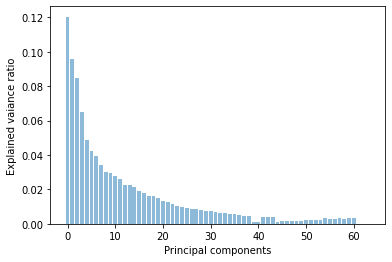

In [7]:
#STEP 5.2
plt.figure(figsize=(6,4))
plt.bar(range(64),explained_variances,alpha=0.5, align = 'center',label='individual explained variance')
plt.ylabel('Explained vaiance ratio')
plt.xlabel('Principal components')

In [8]:
#STEP 6.1
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
projected_3 = X_scaled.dot(vectors.T[2])
projected_4 = X_scaled.dot(vectors.T[3])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2']=projected_2
res['PC3']=projected_3
res['PC4']=projected_4
res['Y']=Y
res.head()

,PC1,PC2,PC3,PC4,Y
0,-1.914214,0.954502,-3.946035,-2.028723,0
1,-0.588980,-0.924636,3.924755,1.779850,1
2,-1.302039,0.317189,3.023333,2.043376,2
3,3.020770,0.868772,-0.801744,2.187039,3
4,-4.528949,1.093480,0.973121,1.419510,4


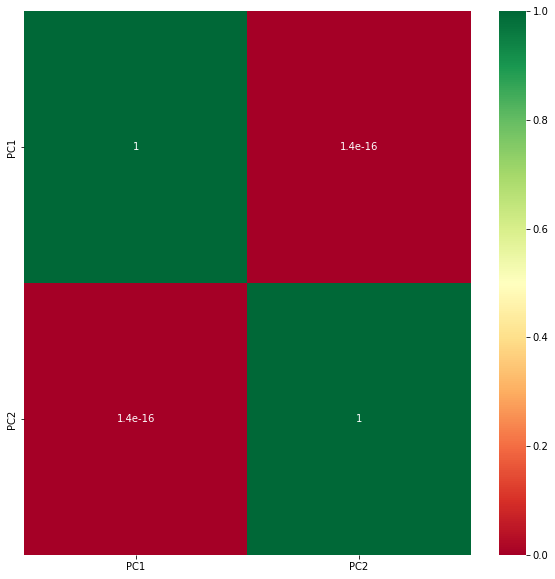

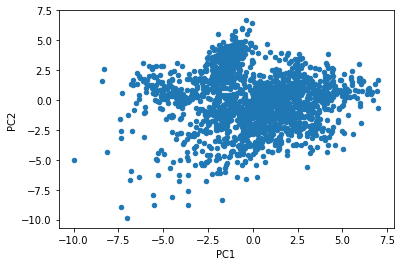

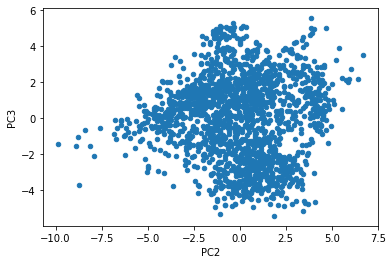

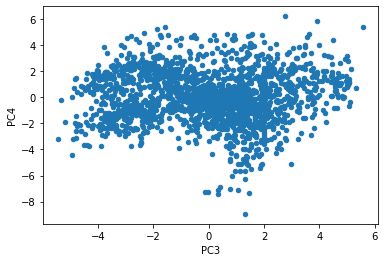

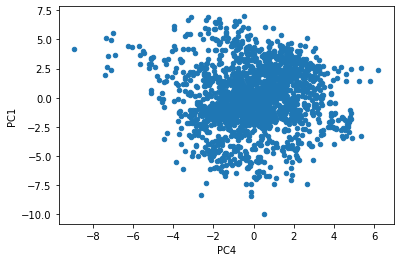

In [9]:
#STEP 6.2
plt.figure(figsize=(10,10))
X=res[["PC1","PC2"]]
p = sns.heatmap(X.corr(), annot=True, cmap='RdYlGn')
res.plot(kind="scatter",x="PC1",y="PC2")
res.plot(kind="scatter",x="PC2",y="PC3")
res.plot(kind="scatter",x="PC3",y="PC4")
res.plot(kind="scatter",x="PC4",y="PC1")

***ASSIGNMENT 4 END***